In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os, sys

# Add to path the parent directory of this notebook dir

sys.path.append(os.path.dirname(os.getcwd()))

import numpy as np



from rl_envs_forge.envs.labyrinth.labyrinth import Labyrinth


from rl_envs_forge.envs.labyrinth.mdp.mdp import LabyrinthMDP


from policy_iteration import (
    find_optimal_policy_q,
    policy_iteration_q,
    policy_evaluation_v,
)

from utils import extract_V_from_Q


from visualize import draw_labyrinth_gridworld

Optimal Policy: {(4, 0): 2, (4, 9): 0, (3, 7): 0, (5, 4): 0, (9, 2): 0, (5, 7): 2, (8, 0): 1, (0, 2): 1, (8, 3): 0, (8, 9): 3, (0, 5): 3, (2, 2): 1, (1, 0): 0, (8, 6): 3, (0, 8): 3, (2, 5): 0, (1, 3): 2, (1, 9): 0, (7, 7): 2, (4, 2): 1, (4, 5): 3, (3, 3): 2, (3, 9): 0, (5, 0): 2, (5, 3): 0, (8, 2): 1, (8, 5): 3, (9, 4): 0, (0, 1): 1, (0, 7): 3, (8, 8): 3, (1, 2): 1, (0, 4): 3, (2, 7): 0, (1, 5): 0, (7, 0): 2, (7, 3): 0, (7, 9): 2, (6, 7): 2, (3, 2): 1, (4, 7): 0, (5, 2): 0, (4, 4): 3, (9, 0): 0, (5, 5): 0, (8, 4): 3, (0, 0): 1, (8, 1): 1, (8, 7): 3, (9, 6): 0, (0, 3): 2, (0, 9): 3, (2, 0): 0, (9, 9): 0, (0, 6): 3, (2, 3): 2, (2, 9): 0, (1, 7): 0, (6, 0): 2, (7, 5): 2, (6, 3): 0, (6, 9): 2}
Value Function: {(4, 0): {0: 2.079487020509003, 1: 2.079487020509003, 2: 3.421652245010003, 3: 2.079487020509003}, (4, 9): {0: 2.467284486612293, 1: 1.2205560379510638, 2: 1.2205560379510638, 3: 1.2205560379510638}, (3, 7): {0: 3.421652245010003, 1: 2.079487020509003, 2: 2.752538318458103, 3: 2.07948

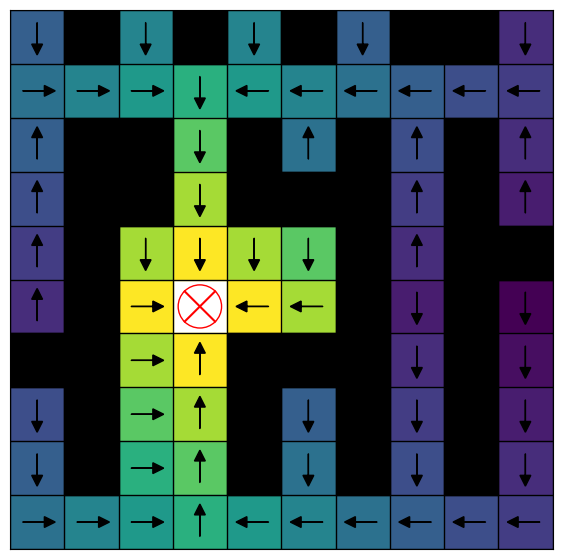

In [ ]:
env = Labyrinth(10, 10, seed=0)
mdp = LabyrinthMDP()

t_r_dict, explored_states = mdp.build_mdp(env)
# len(explored_states)

gamma = 0.9
theta = 1e-6

grid_shape = (env.rows, env.cols)
walls = set([tuple(cell) for cell in list(np.argwhere(env.maze.grid == 0))])

optimal_policy, optimal_value_function_q = find_optimal_policy_q(t_r_dict)

print("Optimal Policy:", optimal_policy)
print("Value Function:", optimal_value_function_q)

# From Q extract V
states = list(set([s for s, _ in t_r_dict.keys()]))
V = {state: 0 for state in states}
optimal_V = policy_evaluation_v(states, optimal_policy, V, t_r_dict, gamma, theta)
print("Optimal Value Function:", optimal_V)

grid_shape = (env.rows, env.cols)
walls = set([tuple(cell) for cell in list(np.argwhere(env.maze.grid == 0))])
draw_labyrinth_gridworld(
    grid_shape,
    walls,
    optimal_V,
    env.maze.target_position,
    policy=optimal_policy,
    enable_heatmap=True,
)

### Plot each iteration

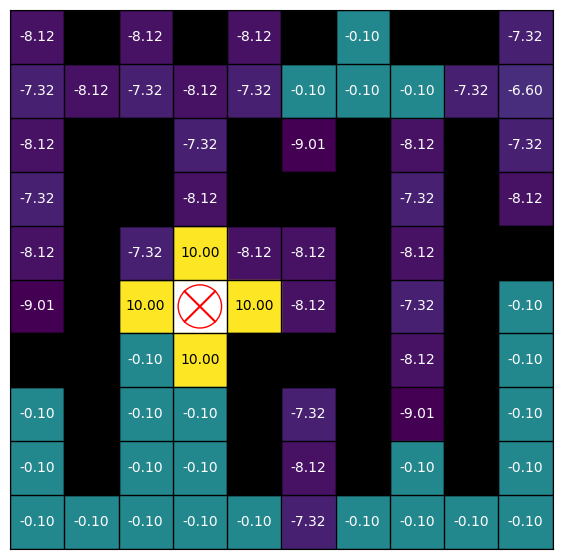

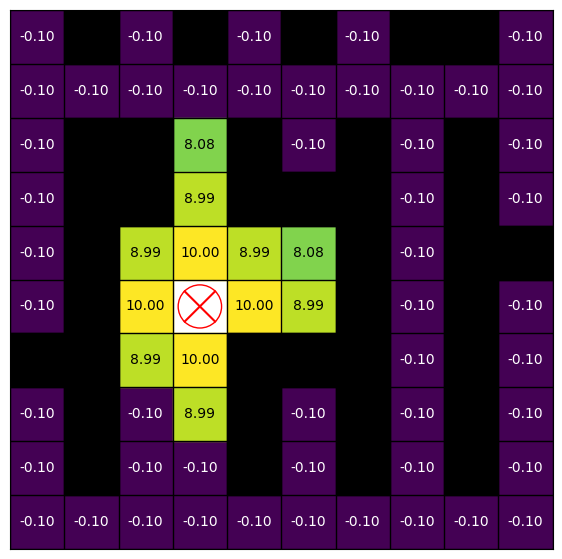

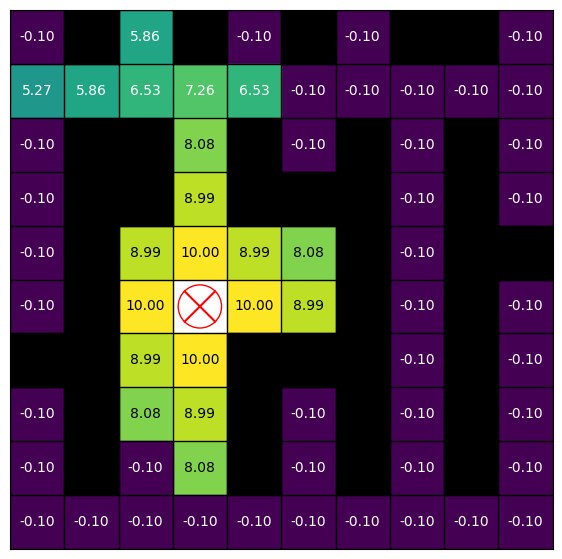

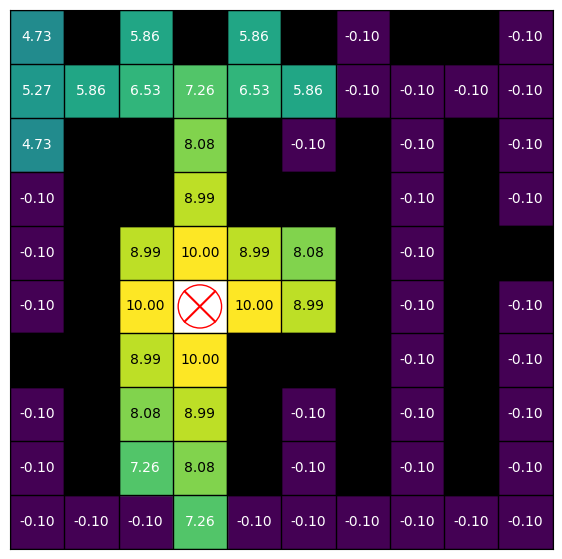

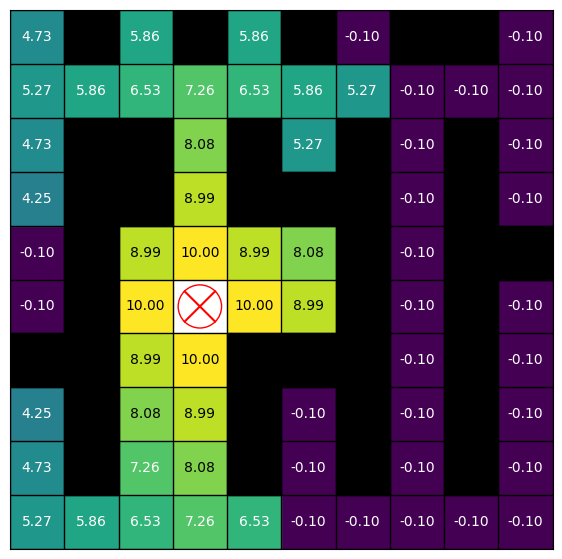

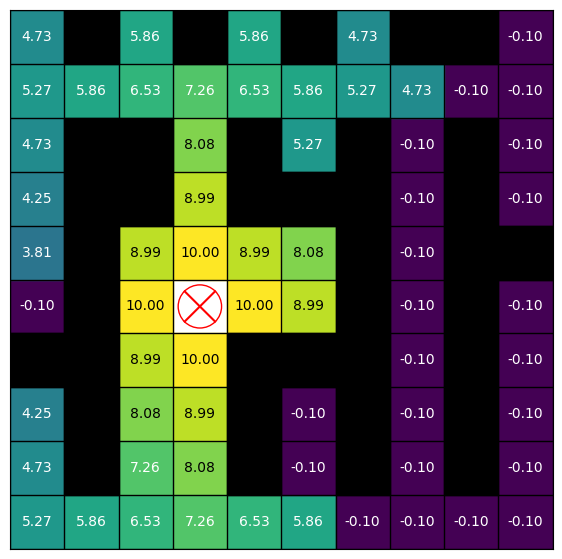

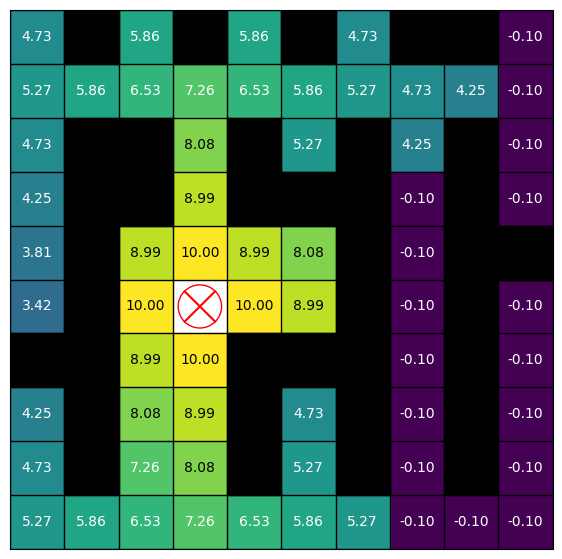

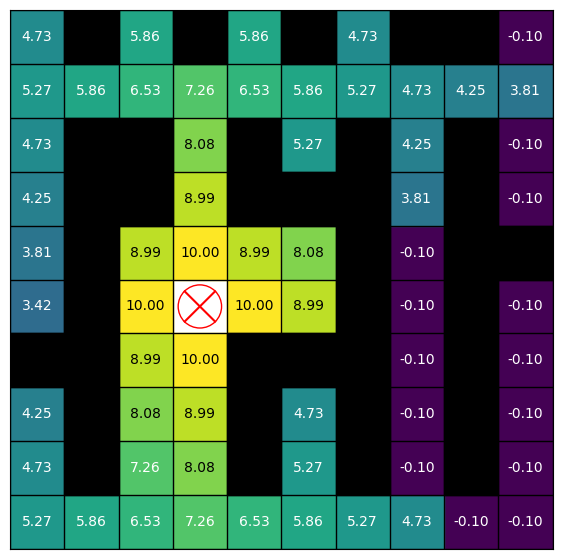

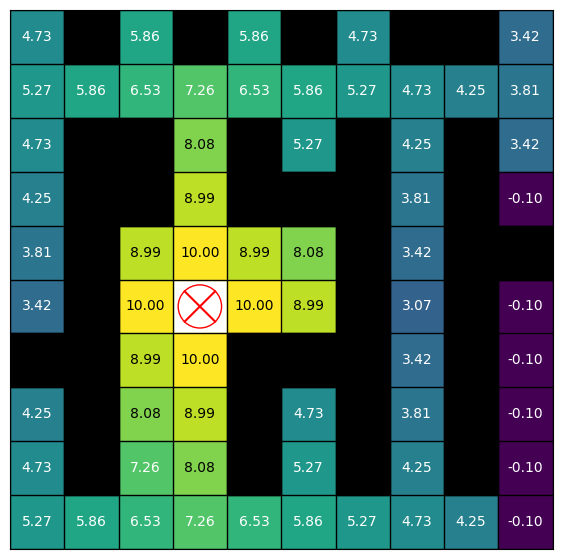

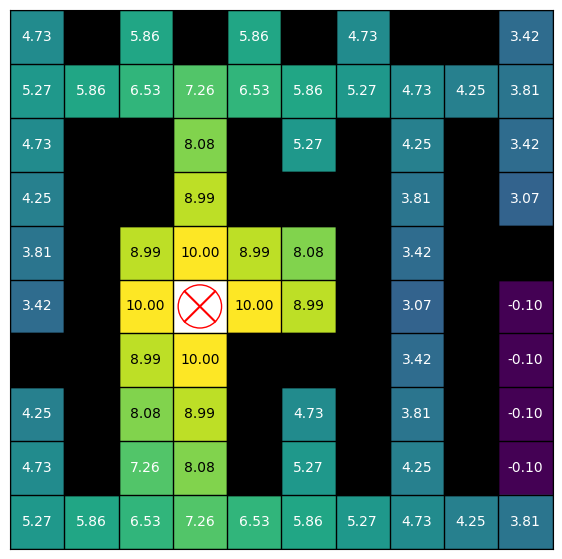

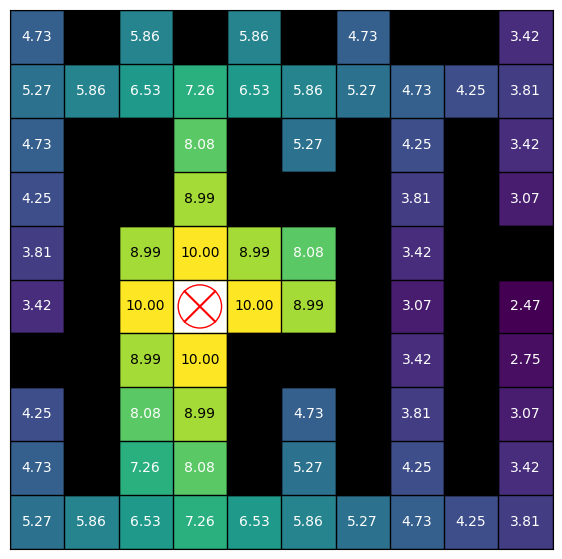

Policy Evaluation Iteration on Break 11


In [4]:
plot_steps = True
plot_every_k_iterations = 1

states = list(set([s for s, _ in t_r_dict.keys()]))
actions = list(set([a for _, a in t_r_dict.keys()]))

# Initialize value function and policy arbitrarily
Q = {state: {action: 0 for action in actions} for state in states}
policy = {state: np.random.choice(actions) for state in states}

iteration = 0
policy_stable = False
while not policy_stable:
    policy, Q, policy_stable = policy_iteration_q(
        t_r_dict, policy, Q, states, actions, gamma, theta
    )
    iteration += 1
    if plot_steps:
        if plot_every_k_iterations == 0 or iteration % plot_every_k_iterations == 0:
            V = extract_V_from_Q(Q, states)
            draw_labyrinth_gridworld(
                grid_shape, walls, V, env.maze.target_position, enable_heatmap=True
            )
    if policy_stable:
        print("Policy Evaluation Iteration on Break", iteration)
        break

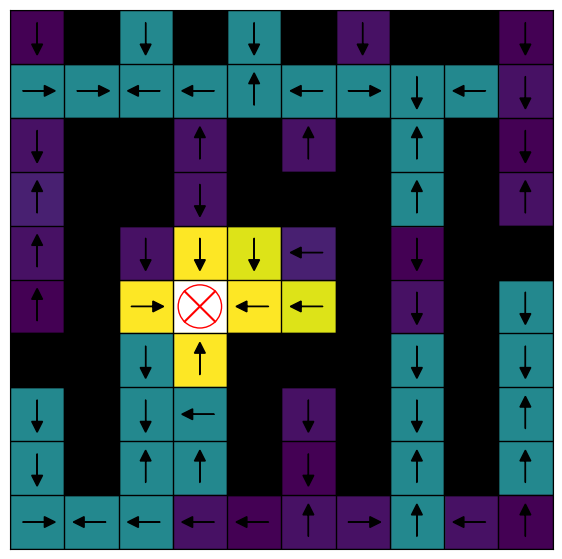

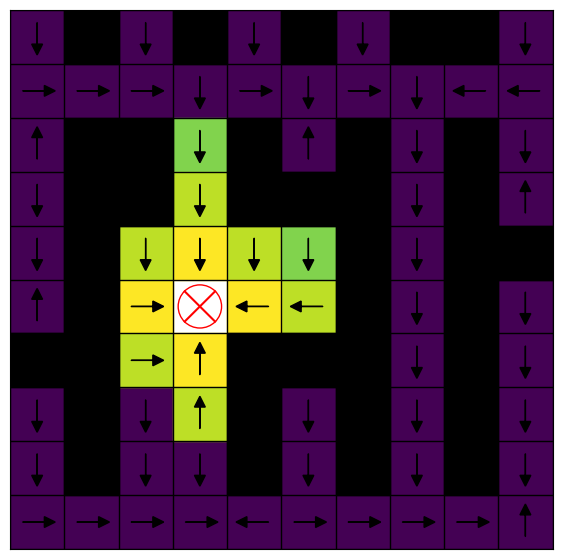

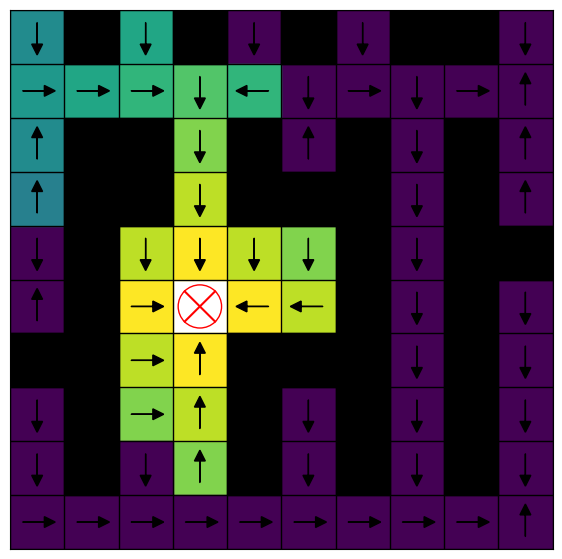

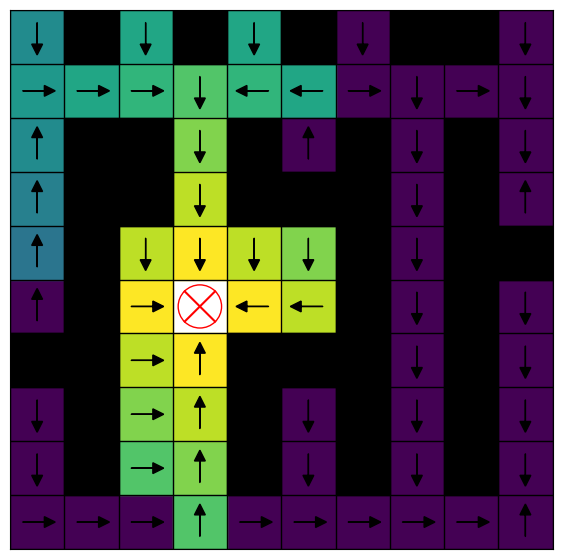

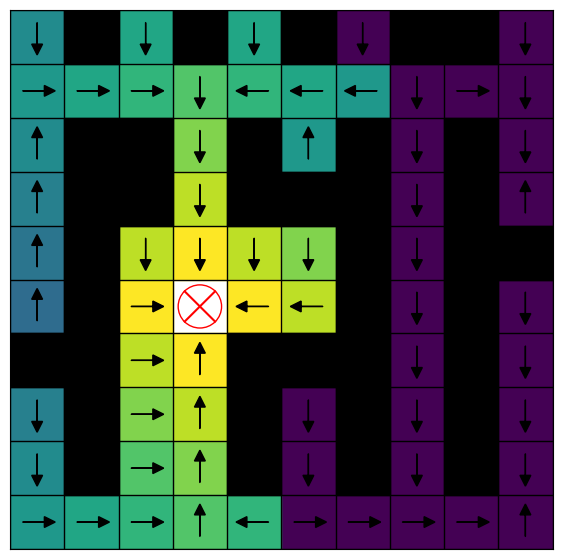

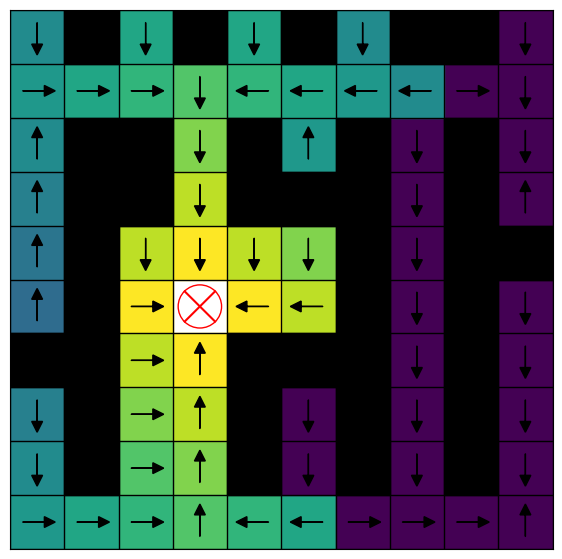

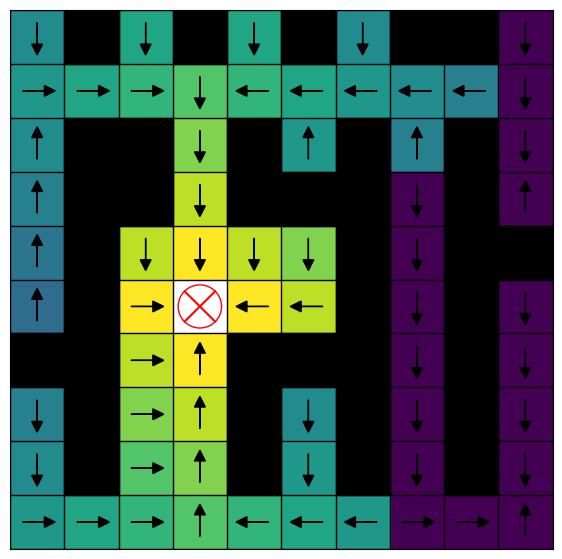

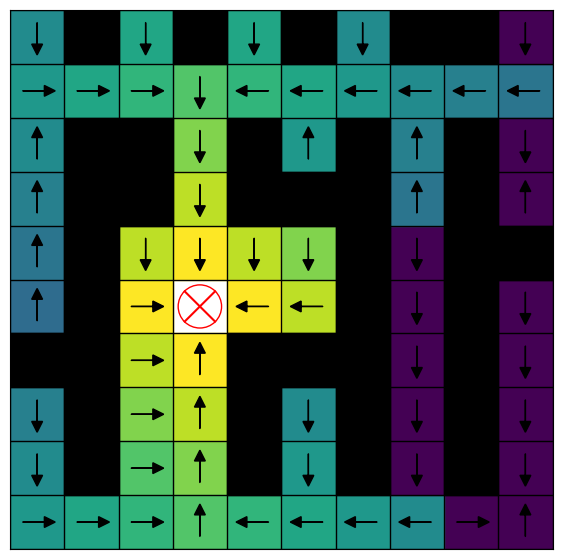

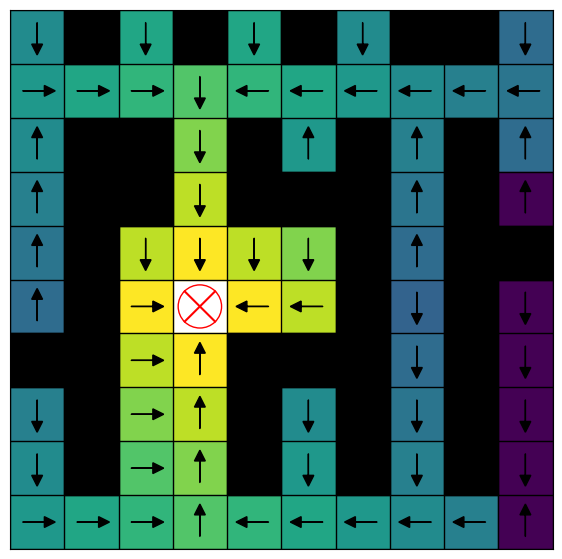

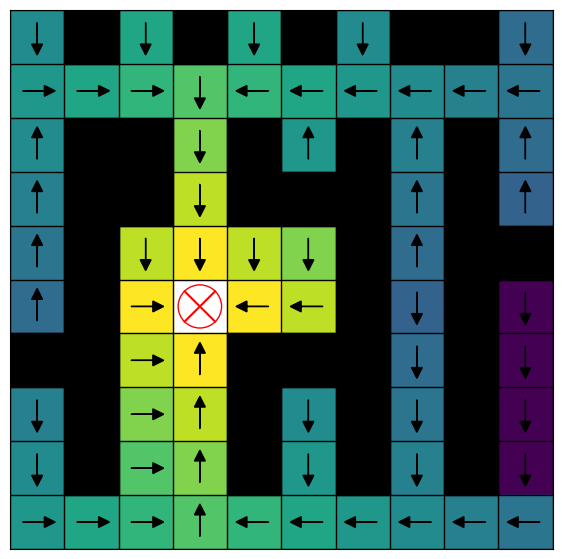

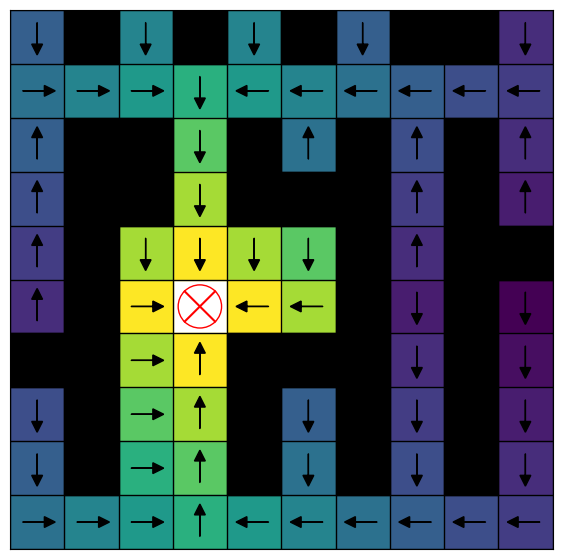

Policy Evaluation Iteration Break on iteration:  11


In [5]:
plot_steps = True
plot_every_k_iterations = 1

states = list(set([s for s, _ in t_r_dict.keys()]))
actions = list(set([a for _, a in t_r_dict.keys()]))

# Initialize value function and policy arbitrarily
Q = {state: {action: 0 for action in actions} for state in states}
policy = {state: np.random.choice(actions) for state in states}

iteration = 0
policy_stable = False
while not policy_stable:
    policy, Q, policy_stable = policy_iteration_q(
        t_r_dict, policy, Q, states, actions, gamma, theta
    )
    iteration += 1
    if plot_steps:
        if plot_every_k_iterations == 0 or iteration % plot_every_k_iterations == 0:
            V = extract_V_from_Q(Q, states)
            draw_labyrinth_gridworld(
                grid_shape,
                walls,
                V,
                env.maze.target_position,
                policy=policy,
                enable_heatmap=True,
            )
    if policy_stable:
        print("Policy Evaluation Iteration Break on iteration: ", iteration)
        break